In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns


In [ ]:
# We upload the data after performing the outlier detection process 
from google.colab import files
uploaded = files.upload()




Saving a.xlsx to a (2).xlsx


In [ ]:
import io 
df = pd.read_excel(io.BytesIO(uploaded['a.xlsx']))
df['Temperature']=df['Temperature'].round(1)
df['Bank Holidays'] = df['Bank Holidays'].fillna(0)
df



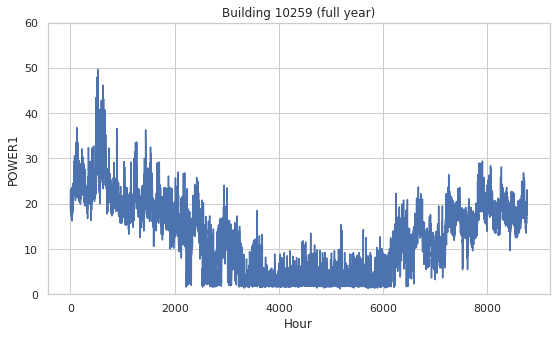

In [ ]:
#Power vs time (hours) (line chart) 
sns.set_style("whitegrid")
ax=sns.lineplot(x = 'Hour', y = 'POWER1', data = df)
plt.title("Building 10259 (full year)")
ay=plt.ylim(0, 60)

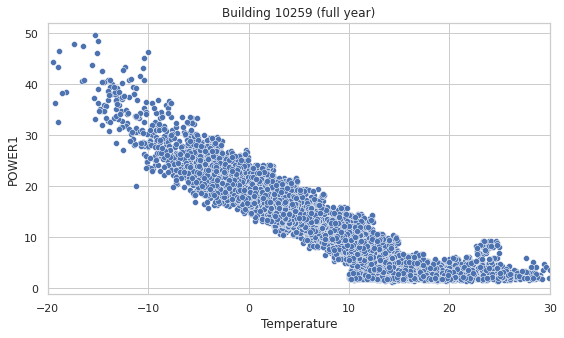

In [ ]:
# Load VS Temperature (scatter plot)
sns.set_style("whitegrid")
sns.scatterplot(x = 'Temperature', y = 'POWER1', data = df)
plt.title("Building 10259 (full year)")
ax=plt.xlim(-20, 30)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


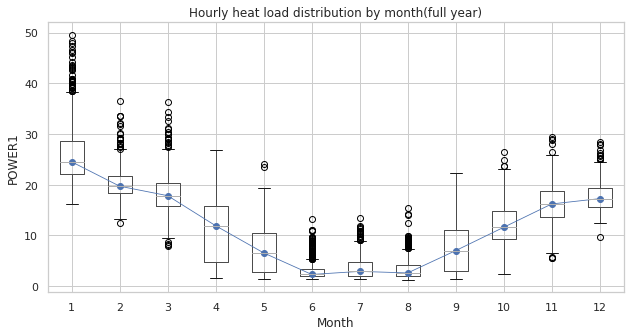

In [ ]:
# Hourly heat load distribution by month (boxplot ) (annual seasonality)
fig, ax = plt.subplots(figsize=(10, 5)) 
sns.set_style("whitegrid")
df.boxplot(column='POWER1', by='Month', ax=ax,)
df.groupby('Month')['POWER1'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('POWER1')
ax.set_title('Hourly heat load distribution by month(full year)')
fig.suptitle('');

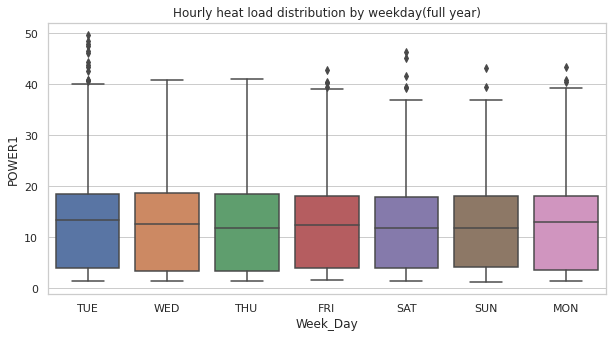

In [ ]:
# Hourly heat load distribution by weekday (boxplot ) (weekly seasonality)
fig,ax=plt.subplots(figsize=(10, 5))
mx=df.groupby('Week_Day')['POWER1'].median()
sns.boxplot(y='POWER1',x='Week_Day',data=df,ax=ax)
plt.title("Hourly heat load distribution by weekday(full year)")
plt.show()

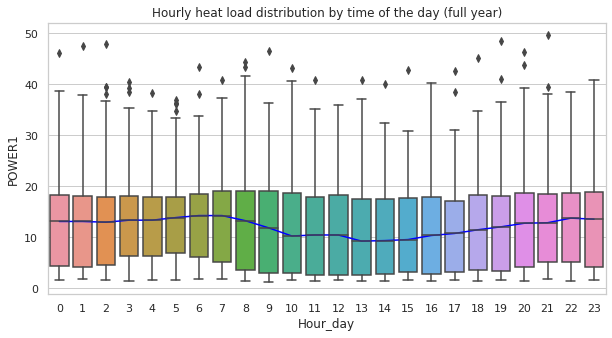

In [ ]:
# Hourly heat load distribution by time of the day (boxplot ) (daily seasonality)
fig,ax=plt.subplots(figsize=(10, 5))
mx=df.groupby('Hour_day')['POWER1'].median()
sns.boxplot(y='POWER1',x='Hour_day',data=df,ax=ax)
plt.title("Hourly heat load distribution by time of the day (full year)")
sns.lineplot(y=mx.values,x=mx.index, color='blue', ax=ax)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location ' lowerright'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


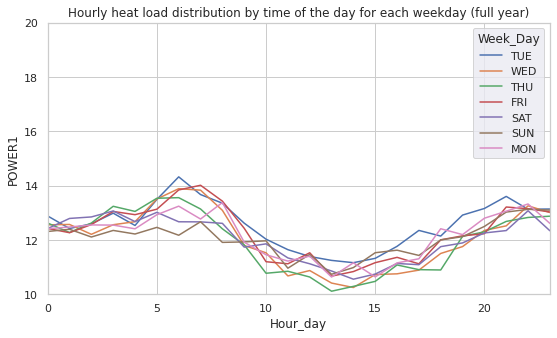

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
# Plot the responses for different events and regions
sns.lineplot(x="Hour_day", y="POWER1",
             hue="Week_Day",ci=None,
             data=df)
sns.set(rc={"figure.figsize":(9, 5)}) #width=8, height=4
plt.title("Hourly heat load distribution by time of the day for each weekday (full year)")
plt.legend(loc=' lowerright', title='Week_Day')
ay=plt.ylim(10, 20)
ax=plt.xlim(0, 23)

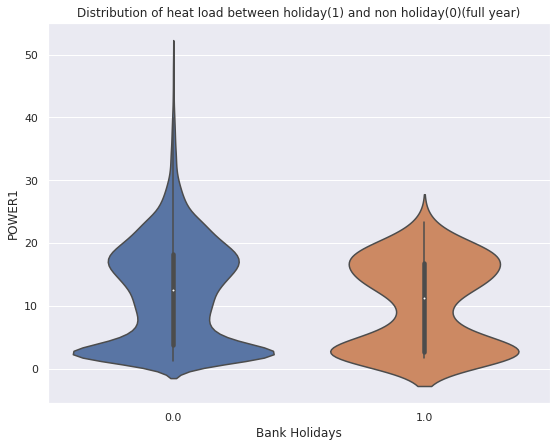

In [ ]:
#violin plot (heat load distribution between holiday and non holiday )
fig, ax = plt.subplots(figsize =(9, 7))
plt.title("Distribution of heat load between holiday(1) and non holiday(0)(full year)")
sns.violinplot(ax = ax,y = df["POWER1"], x = df['Bank Holidays'] )

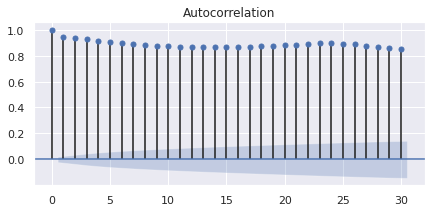

In [ ]:
# Autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(df.POWER1, ax=ax, lags=30)
plt.show()

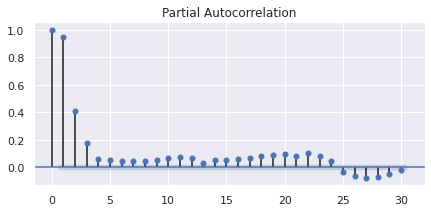

In [ ]:
#Partial Autocorrelation
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(df.POWER1, ax=ax, lags=30)
plt.show()

In [ ]:
#@title # Load Assessment & Graphic exploration (Winter term)

In [ ]:
#we filter the data and extract the winter term months
dk=df[(df['Month'] == 1)| (df['Month'] == 2)| (df['Month'] == 3)| (df['Month'] == 11)| (df['Month'] == 12)]

In [ ]:
#we select the months (january to march)
df_winter_term=df[(df['Month'] == 1)| (df['Month'] == 2)| (df['Month'] == 3)]
df_winter_term

In [ ]:
#we select the months (nov to december)
df_winter_term1=df[(df['Month'] == 11)| (df['Month'] == 12)]
df_winter_term1

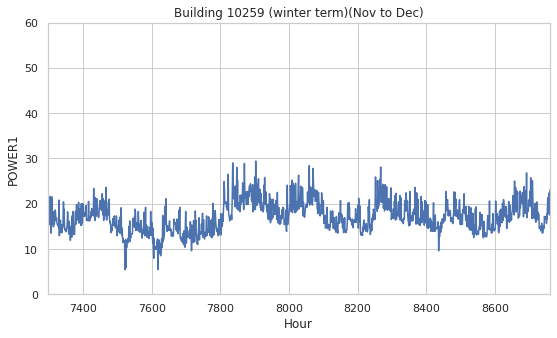

In [ ]:
#Power vs time (hours) (line chart) (November /December)
sns.set_style("whitegrid")
ax=sns.lineplot(x = 'Hour', y = 'POWER1', data = df_winter_term1)
plt.title("Building 10259 (winter term)(Nov to Dec)")
ay=plt.ylim(0, 60)
ax=plt.xlim(7297, 8760)

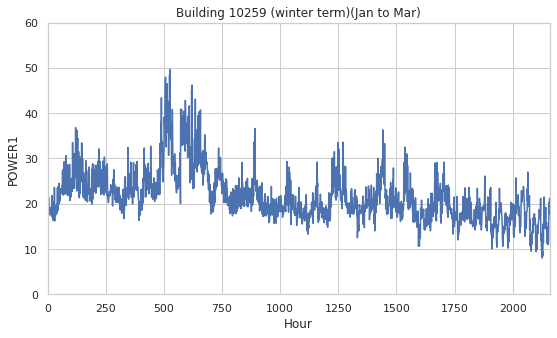

In [ ]:
#Power vs time (hours) (line chart) (January to March)
sns.set_style("whitegrid")
ax=sns.lineplot(x = 'Hour', y = 'POWER1', data = df_winter_term)
plt.title("Building 10259 (winter term)(Jan to Mar)")
ay=plt.ylim(0, 60)
ax=plt.xlim(0, 2160)

Text(0.5, 1.0, 'Building 10259 (winter term)')

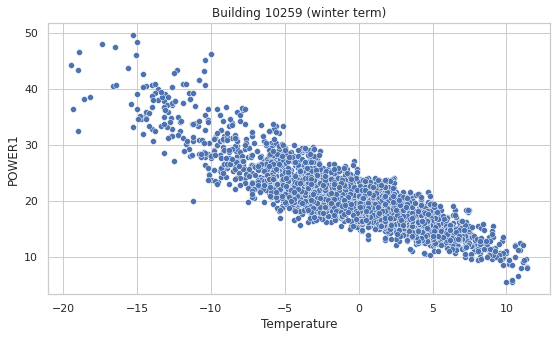

In [ ]:
# Load VS Temperature (scatter plot) (November /December)
sns.set_style("whitegrid")
sns.scatterplot(x = 'Temperature', y = 'POWER1', data = dk)
plt.title("Building 10259 (winter term)")


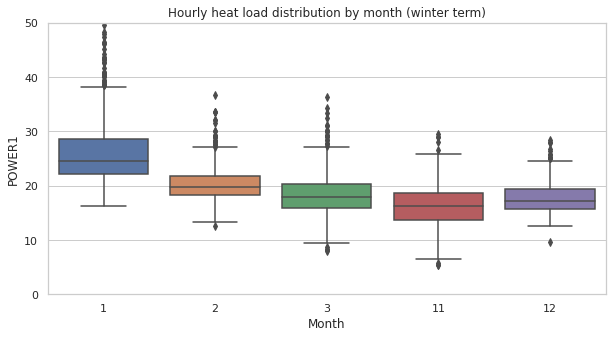

In [ ]:
# Hourly heat load distribution by month (boxplot ) (annual seasonality)
fig,ax=plt.subplots(figsize=(10, 5))
mx=dk.groupby('Month')['POWER1'].median()
sns.boxplot(y='POWER1',x='Month',data=dk,ax=ax)
plt.title("Hourly heat load distribution by month (winter term)")
ay=plt.ylim(0, 50)
plt.show()

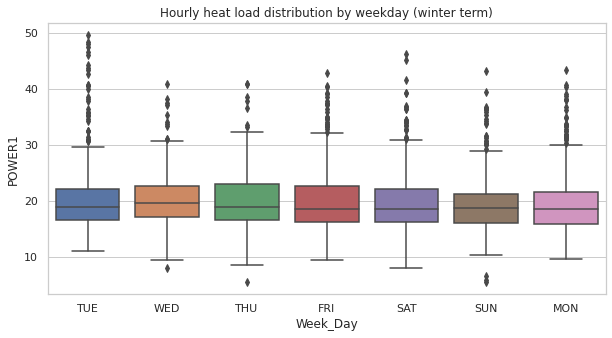

In [ ]:
## Hourly heat load distribution by weekday (boxplot ) (weekly seasonality)
fig,ax=plt.subplots(figsize=(10, 5))
mx=dk.groupby('Week_Day')['POWER1'].median()
sns.boxplot(y='POWER1',x='Week_Day',data=dk,ax=ax)
plt.title("Hourly heat load distribution by weekday (winter term)")
plt.show()

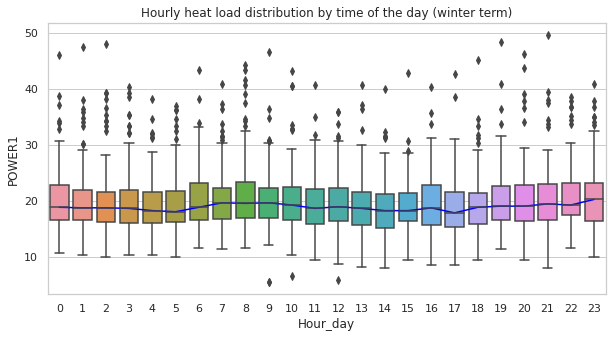

In [ ]:
# Hourly heat load distribution by time of the day (boxplot ) (daily seasonality)
fig,ax=plt.subplots(figsize=(10, 5))
mx=dk.groupby('Hour_day')['POWER1'].median()
sns.boxplot(y='POWER1',x='Hour_day',data=dk,ax=ax)
plt.title("Hourly heat load distribution by time of the day (winter term)")
sns.lineplot(y=mx.values,x=mx.index, color='blue', ax=ax)
plt.show()

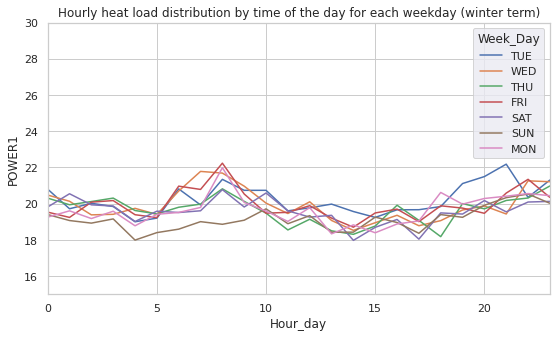

In [ ]:
sns.set_theme(style="whitegrid")
# Plot the responses for different events and regions
sns.lineplot(x="Hour_day", y="POWER1",
             hue="Week_Day",ci=None,
             data=dk)
sns.set(rc={"figure.figsize":(9, 5)}) #width=8, height=4
plt.title("Hourly heat load distribution by time of the day for each weekday (winter term)")
plt.legend(loc='upper right', title='Week_Day')
ay=plt.ylim(15, 30)
ax=plt.xlim(0, 23)

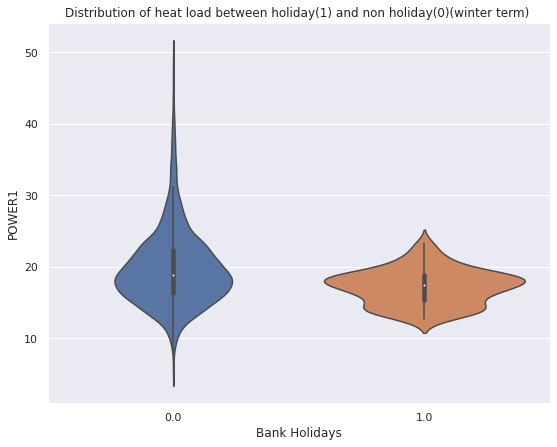

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
plt.title("Distribution of heat load between holiday(1) and non holiday(0)(winter term) ")
sns.violinplot(ax = ax,y =dk["POWER1"], x =dk['Bank Holidays'] )

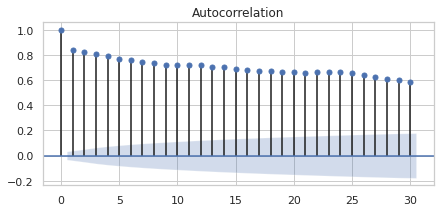

In [ ]:
# Autocorrelation 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(dk.POWER1, ax=ax, lags=30)
plt.show()

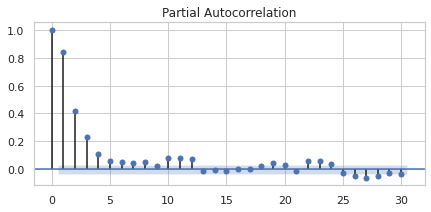

In [ ]:
#Partial Autocorrelation
fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(dk.POWER1, ax=ax, lags=30)
plt.show()